In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [2]:
data = pd.read_csv("data/drill_final.csv")

In [3]:
data.head()

,d,f,n,Vc,Mz,Fz,logM,logFz,logd,logf,logVc
0,4,0.06,450,5.65,0.326572,243.497025,-0.486021,2.386494,0.60206,-1.221849,0.752422
1,4,0.06,500,6.28,0.354396,244.710706,-0.450512,2.388653,0.60206,-1.221849,0.798180
2,4,0.06,550,6.91,0.355931,244.605716,-0.448635,2.388467,0.60206,-1.221849,0.839573
3,4,0.06,600,7.54,0.317263,240.793587,-0.498581,2.381645,0.60206,-1.221849,0.877361
4,4,0.07,450,5.65,0.449351,270.275328,-0.347414,2.431806,0.60206,-1.154902,0.752422


In [4]:
data.columns

Index(['d', 'f', 'n', 'Vc', 'Mz', 'Fz', 'logM', 'logFz', 'logd', 'logf',
       'logVc'],
      dtype='object')

In [13]:
data = data.loc[:, ~data.columns.str.match('Unnamed')]
data = data.loc[:, data.columns.str.match('log')]
data

,logM,logFz,logd,logf,logVc
0,-0.486021,2.386494,0.602060,-1.221849,0.752422
1,-0.450512,2.388653,0.602060,-1.221849,0.798180
2,-0.448635,2.388467,0.602060,-1.221849,0.839573
3,-0.498581,2.381645,0.602060,-1.221849,0.877361
4,-0.347414,2.431806,0.602060,-1.154902,0.752422
5,-0.399485,2.435412,0.602060,-1.154902,0.798180
6,-0.349107,2.430053,0.602060,-1.154902,0.839573
7,-0.332686,2.429673,0.602060,-1.154902,0.877361
8,-0.270130,2.469256,0.602060,-1.096910,0.752422
9,-0.410706,2.478144,0.602060,-1.096910,0.798180


## Simple linear regression 

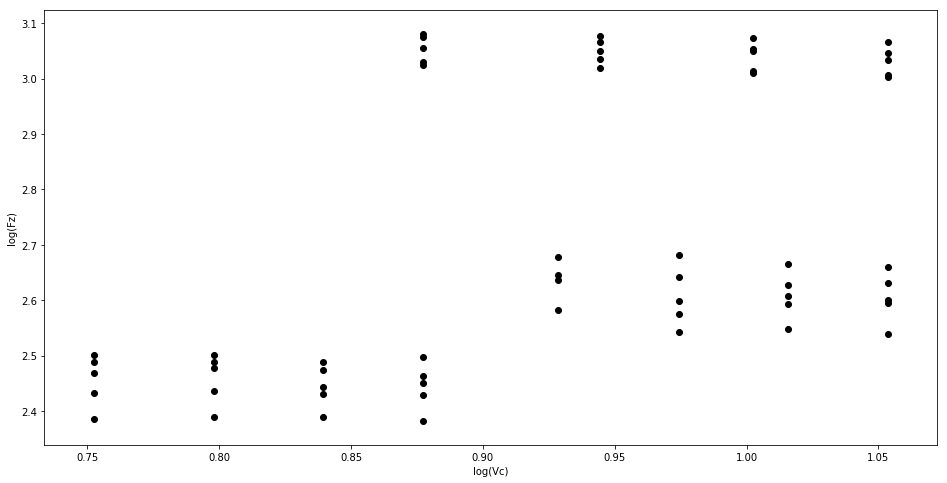

In [14]:
plt.figure(figsize=(16, 8))
plt.scatter(
    data['logVc'],
    data['logFz'],
    c='black'
)
plt.xlabel("log(Vc)")
plt.ylabel("log(Fz)")
plt.show()

In [17]:
X = data['logVc'].values.reshape(-1,1)
y = data['logFz'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
print(reg.coef_[0][0])
print(reg.intercept_[0])

print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

1.3035173807264158
1.4966105537096488
The linear model is: Y = 1.4966 + 1.3035X


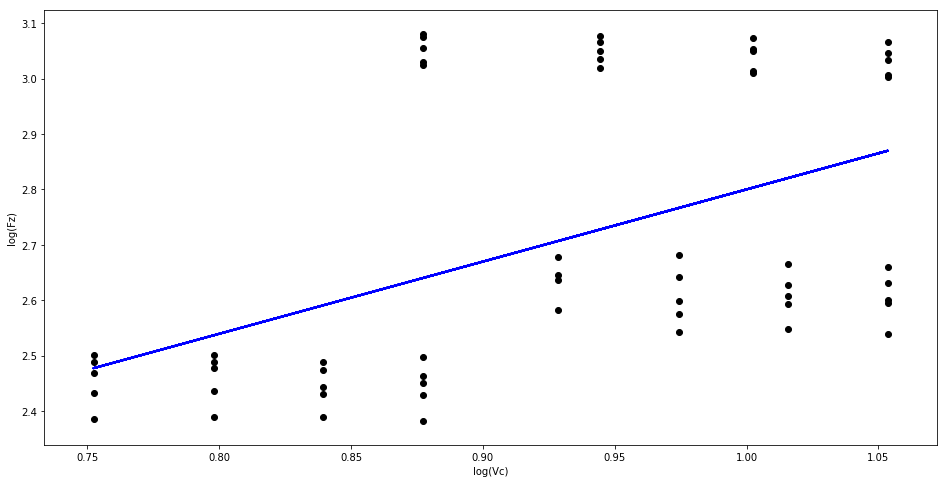

In [19]:
predictions = reg.predict(X)

plt.figure(figsize=(16, 8))
plt.scatter(
    data['logVc'],
    data['logFz'],
    c='black'
)
plt.plot(
    data['logVc'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("log(Vc)")
plt.ylabel("log(Fz)")
plt.show()

In [20]:
X = data['logVc']
y = data['logFz']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  logFz   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     17.93
Date:                Wed, 29 May 2019   Prob (F-statistic):           8.45e-05
Time:                        23:13:48   Log-Likelihood:                 5.0738
No. Observations:                  59   AIC:                            -6.148
Df Residuals:                      57   BIC:                            -1.992
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4966      0.287      5.220      0.0

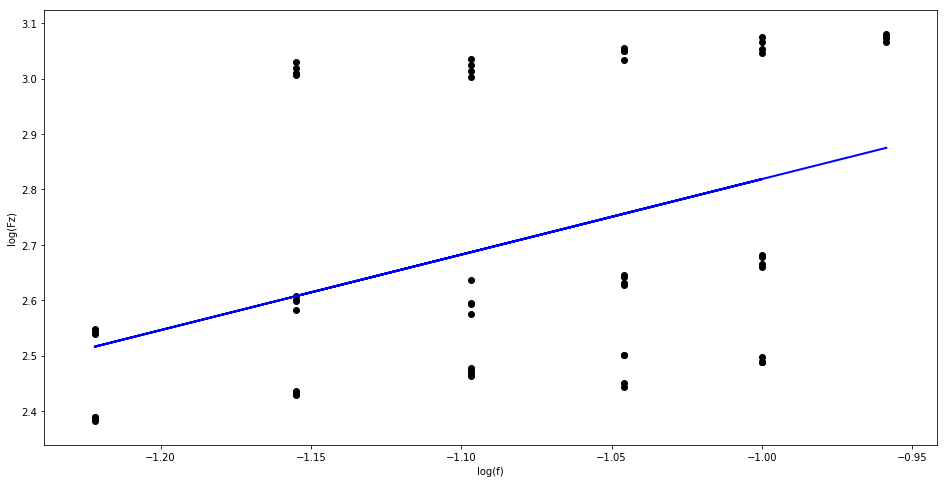

In [62]:
X = data['logf'].values.reshape(-1,1)
y = data['logFz'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

predictions = reg.predict(X)

plt.figure(figsize=(16, 8))
plt.scatter(
    data['logf'],
    data['logFz'],
    c='black'
)
plt.plot(
    data['logf'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("log(f)")
plt.ylabel("log(Fz)")
plt.show()

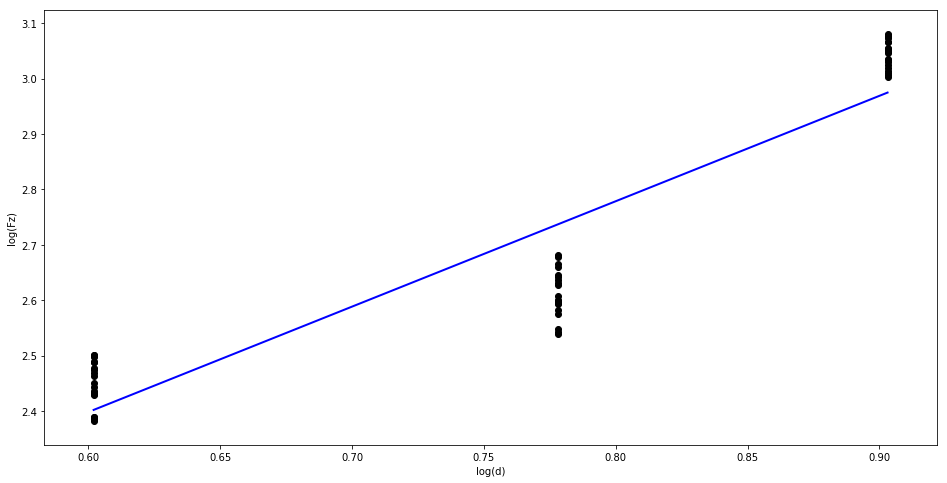

In [61]:
X = data['logd'].values.reshape(-1,1)
y = data['logFz'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

predictions = reg.predict(X)

plt.figure(figsize=(16, 8))
plt.scatter(
    data['logd'],
    data['logFz'],
    c='black'
)
plt.plot(
    data['logd'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("log(d)")
plt.ylabel("log(Fz)")
plt.show()

## Multiple linear regression 

In [42]:
Xs = data.drop(['logFz', 'logM'], axis=1)
y = data[['logFz','logM']]
# y2 = data['logM'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(Xs, y)
# reg2 = LinearRegression()
# reg2.fit(Xs, y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
print("log(Fz), log(Mz)")
print(reg.coef_)
print(reg.intercept_)
# print("log(Mz)")
# print(reg2.coef_)
# print(reg2.intercept_)

log(Fz), log(Mz)
[[ 2.24690207  0.51750275 -0.79753951]
 [ 2.08564019  0.98747523  0.14149924]]
[ 2.29448831 -0.62975607]


In [44]:
print("The linear model of log(Fz) is: Y = {:.5} + {:.5}*log(d) + {:.5}*log(f) + {:.5}*log(Vc)".format
      (reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]))
print("The linear model of log(Mz) is: Y = {:.5} + {:.5}*log(d) + {:.5}*log(f) + {:.5}*log(Vc)".format
      (reg.intercept_[1], reg.coef_[1][0], reg.coef_[1][1], reg.coef_[1][2]))

The linear model of log(Fz) is: Y = 2.2945 + 2.2469*log(d) + 0.5175*log(f) + -0.79754*log(Vc)
The linear model of log(Mz) is: Y = -0.62976 + 2.0856*log(d) + 0.98748*log(f) + 0.1415*log(Vc)


In [45]:
print(reg.score(Xs, y))
# print("Mz", reg2.score(Xs, y2))

0.9457397470450738


In [55]:
X = np.column_stack((data['logd'], data['logf'], data['logVc']))
y = data['logFz']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  logFz   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     302.8
Date:                Thu, 30 May 2019   Prob (F-statistic):           3.72e-34
Time:                        07:18:10   Log-Likelihood:                 81.470
No. Observations:                  59   AIC:                            -154.9
Df Residuals:                      55   BIC:                            -146.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2945      0.149     15.431      0.0

In [56]:
y = data['logM']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   logM   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     332.1
Date:                Thu, 30 May 2019   Prob (F-statistic):           3.38e-35
Time:                        07:18:27   Log-Likelihood:                 72.993
No. Observations:                  59   AIC:                            -138.0
Df Residuals:                      55   BIC:                            -129.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6298      0.172     -3.668      0.0

In [60]:
predictorcol = list(data.columns)  #自变量列表
import itertools
AICs = {}
for k in range(2,len(predictorcol)+1):  
    for variables in itertools.combinations(predictorcol,k): # 所有自变量组合
        predictors = data[list(variables)]
        predictors2 = sm.add_constant(predictors)
        est = sm.OLS(y,predictors2)
        est2 = est.fit()
        AICs[variables] = est2.aic # 计算自变量组合的AIC值，存入词典
# 显示AIC最小的10个组合
from collections import Counter
c = Counter(AICs)
c.most_common()[::-10]

[(('logM', 'logf', 'logVc'), -4145.791702457905),
 (('logM', 'logd', 'logf'), -4005.4292619929483),
 (('logFz', 'logd', 'logVc'), -96.50841048176707)]